In [1]:
import sys
sys.path.append('../SRC')
import PIOT_imports
import csv
import pandas as pd
import numpy as np
import torch
import CoDaS_PIOT_general_prior_C as PIOT
import itertools
import Sinkhorn
import matplotlib.pylab as plt
import matplotlib
import pickle

In [2]:
def read_EU_T():
    folder_path = './EU_migration_data/'

    file_1 = 'EU_migration_data_1.tsv'
    df_1 = pd.read_csv(folder_path + file_1, sep = ' ')

    file_2 = 'EU_migration_data_2.tsv'
    df_2 = pd.read_csv(folder_path + file_2, sep = ' ')
    df = pd.concat([df_1, df_2.drop(labels = 'Origin', axis = 1)], axis = 1)

    countries = ['DK', 'DE', 'NL', 'CZ', 'BE', 'LU', 'FR', 'CH', 'AT']
    countries.sort()

    data = df.loc[df['Origin'].isin(countries)]
    data = data[['Origin']+countries].reindex()

    T_g = torch.tensor(data[countries].values, dtype=float)

    return T_g

def plot_pdf(data1, data2, data3, C = None, bw_method = 0.05):

    
    data1_all = []
    for key in data1.keys():
        data1_all += data1[key]
        
    nr = len(data1[key][0])
    nc = len(data1[key][0][0])
    
    data2_all = []
    for key in data2.keys():
        data2_all += data2[key]
    
    data3_all = []
    for key in data3.keys():
        data3_all += data3[key]

    colors = ['r', 'g', 'b']
    
    mat1, mat2, mat3 = np.zeros((nr, nc)), np.zeros((nr, nc)), np.zeros((nr, nc))

    for i in range(nr):
        for j in range(nc):
            x1 = np.array([K[i][j].numpy() for K in data1_all])
            x2 = np.array([K[i][j].numpy() for K in data2_all])
            x3 = np.array([K[i][j].numpy() for K in data3_all])
            
            mat1[i][j] = np.mean(x1)
            mat2[i][j] = np.mean(x2)
            mat3[i][j] = np.mean(x3)
            
            df1 = pd.DataFrame(x1, columns = ['Prior 1'])
            df2 = pd.DataFrame(x2, columns = ['Prior 2'])
            df3 = pd.DataFrame(x3, columns = ['Prior 3'])
            
            fig, ax1 = plt.subplots()
            
            df1.plot.density(bw_method=bw_method, color='r', ax = ax1)
            df2.plot.density(bw_method=bw_method, color='g', ax = ax1)
            df3.plot.density(bw_method=bw_method, color='b', ax = ax1)
            
            ylim = ax1.get_ylim()
            if C is not None:
                ax1.vlines(C[i][j], ymin = 0, ymax = 100, linestyles = 'dashed')
            ax1.set_ylim((0, ylim[1]))
            ax1.set_xlim(left=0)
            ax1.set_xlabel('$C({},{})$'.format(i+1,j+1))
            fig.tight_layout()
            fig.savefig('C_{}_{}'.format(i+1, j+1))
    
    return mat1, mat2, mat3

def plot_pdf_plan(data1, T = None, bw_method = 0.05):

    colors = ['r', 'g', 'b']
    nr = len(data1[0])
    nc = len(data1[0][0])
    
    mat1 = np.zeros((nr, nc))

    for i in range(nr):
        for j in range(nc):
            x1 = np.array([K[i][j].numpy() for K in data1])
            
            mat1[i][j] = np.mean(x1)

            df1 = pd.DataFrame(x1, columns = ['Prior 1'])
            
            ax1 = df1.plot.density(bw_method=bw_method, color='r')
            
            ylim = ax1.get_ylim()
            if T is not None:
                ax1.vlines(T[i][j], ymin = 0, ymax = 100, linestyles = 'dashed')
            ax1.set_ylim((0, ylim[1]))
            ax1.set_xlim(left=0)
            ax1.set_xlabel('$T({},{})$'.format(i+1,j+1))
            
    
    return mat1

def plot_pdf_C(data1, i = 0, j = 0, C = None, bw_method = 0.05):

    colors = ['r', 'g', 'b']
    nr = len(data1[0])
    nc = len(data1[0][0])
    
    mat1 = np.zeros((nr, nc))

    x1 = np.array([K[i][j].numpy() for K in data1])
    mat1[i][j] = np.mean(x1)
    df1 = pd.DataFrame(x1)

    ax1 = df1.plot.density(bw_method=bw_method, color='r')

    ylim = ax1.get_ylim()
    if C is not None:
        ax1.vlines(T[i][j], ymin = 0, ymax = 100, linestyles = 'dashed')
    ax1.set_ylim((0, ylim[1]))
    ax1.set_xlim(left=0)
    ax1.set_xlabel('$C^p({},{})$'.format(i+1,j+1))

    
    return mat1

## Plot C PDF

In [3]:
folder_path = './'

file_1 = './data/data_C_full_uniform.pkl'
with open(file_1, 'rb') as handle:
    data_C_1 = pickle.load(handle)

file_2 = './data/data_C_uniform.pkl'
with open(file_2, 'rb') as handle:
    data_C_2 = pickle.load(handle)
    
file_3 = './data/data_C_custom-1.pkl'
with open(file_3, 'rb') as handle:
    data_C_3 = pickle.load(handle)


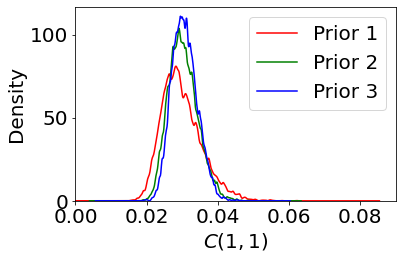

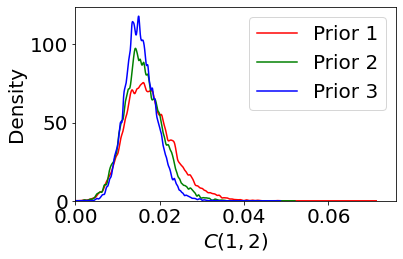

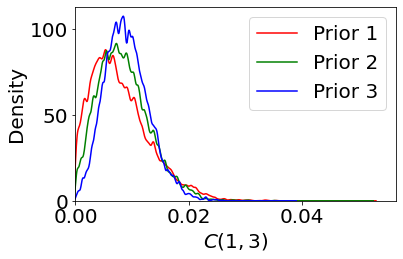

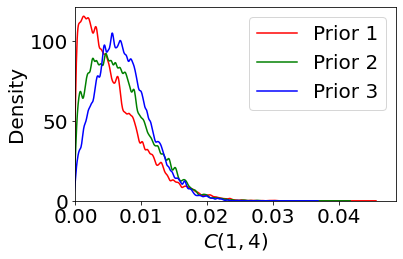

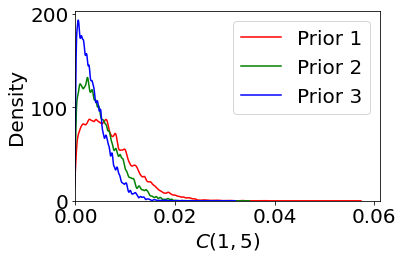

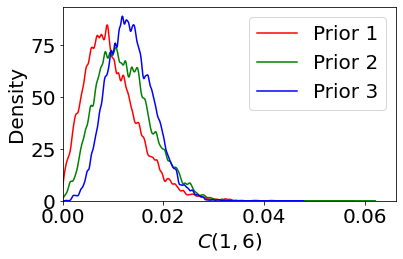

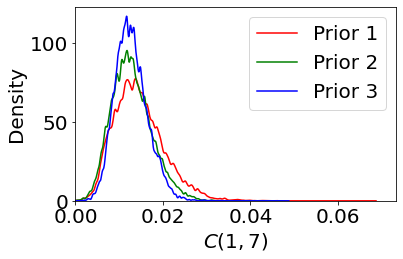

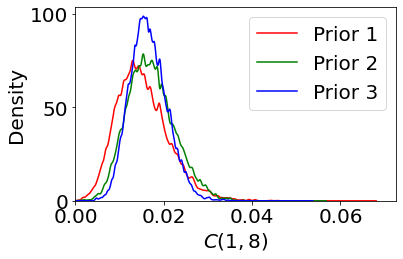

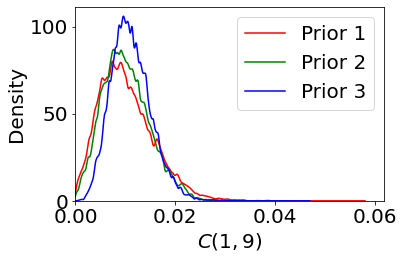

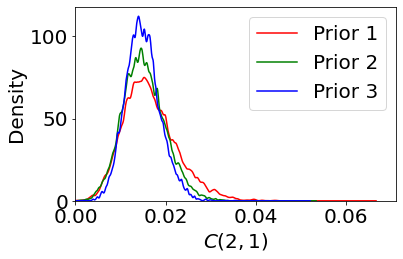

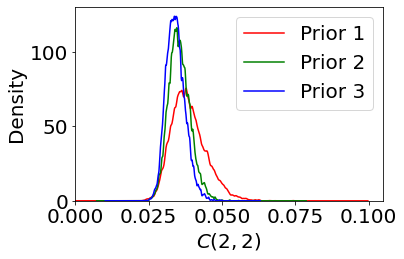

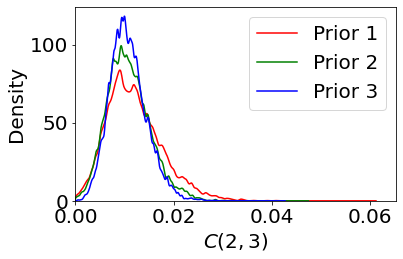

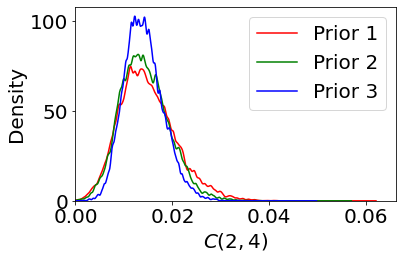

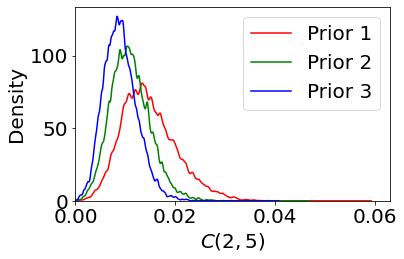

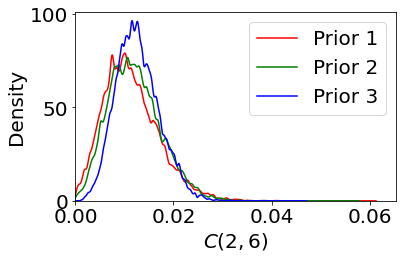

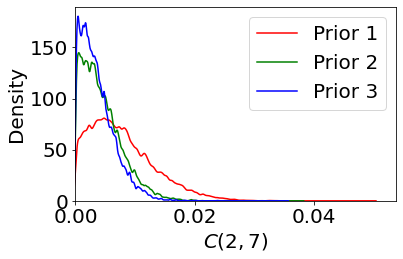

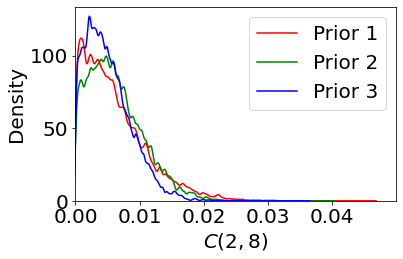

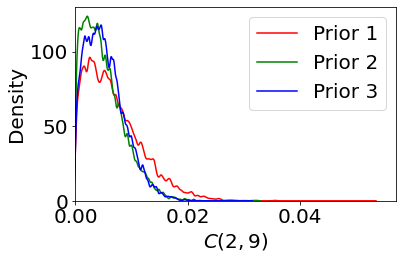

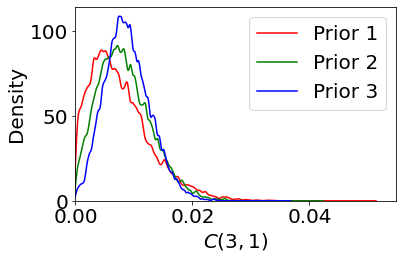

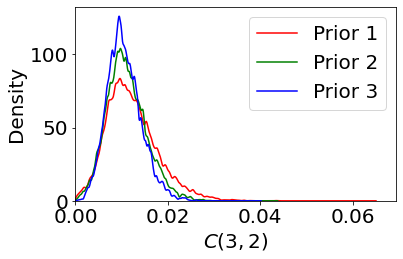

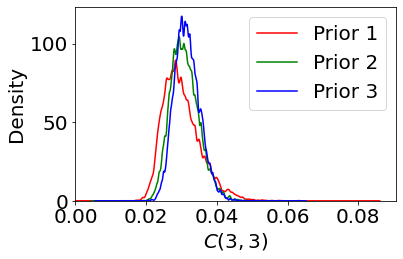

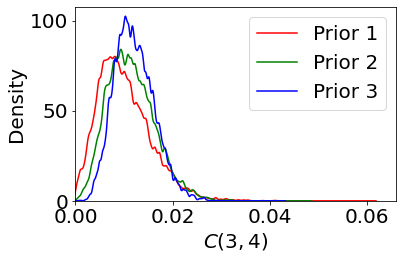

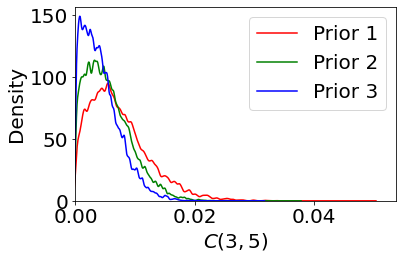

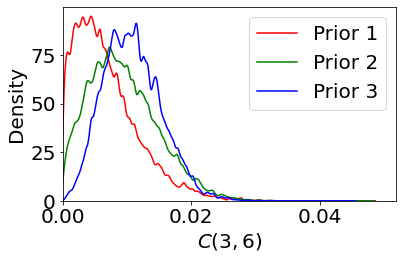

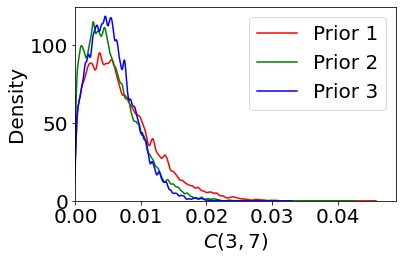

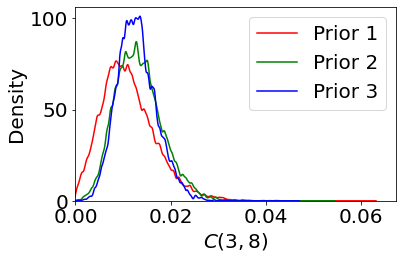

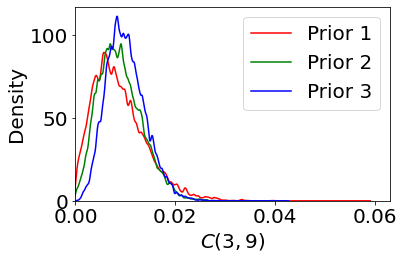

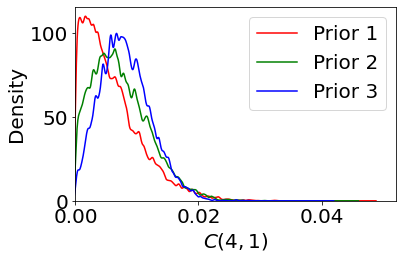

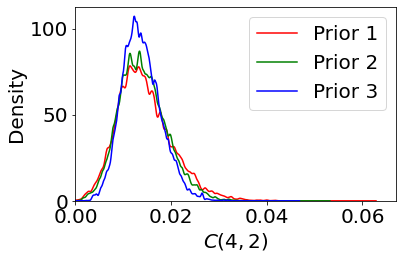

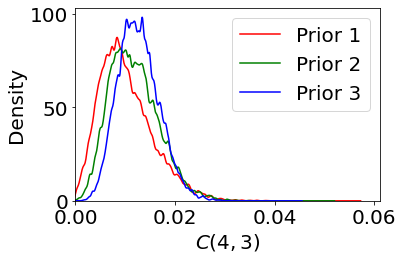

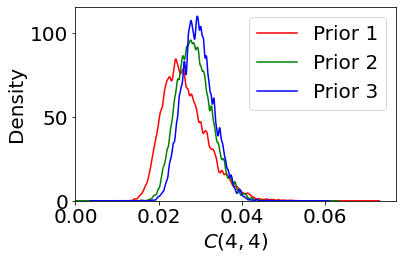

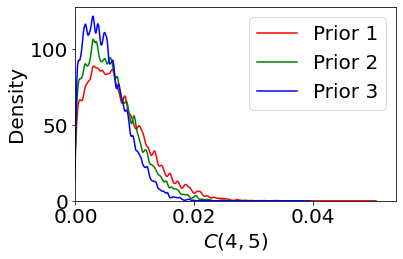

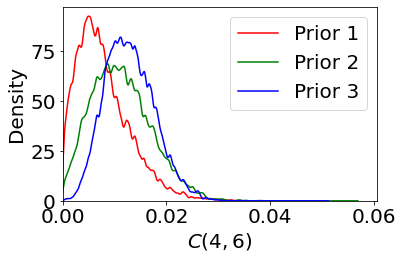

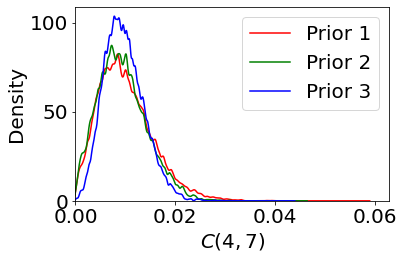

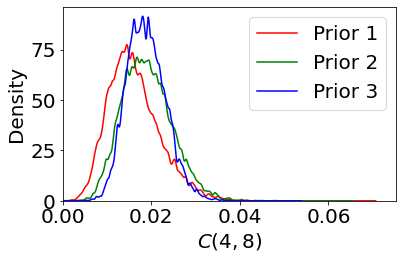

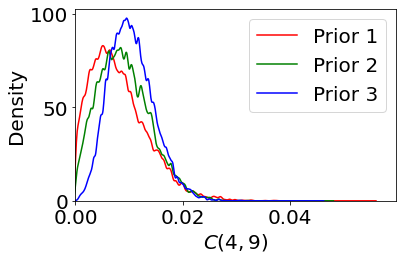

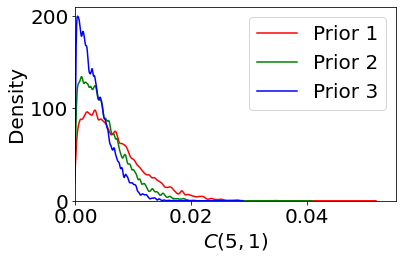

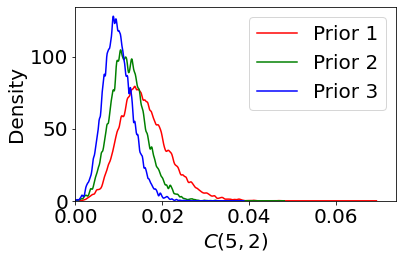

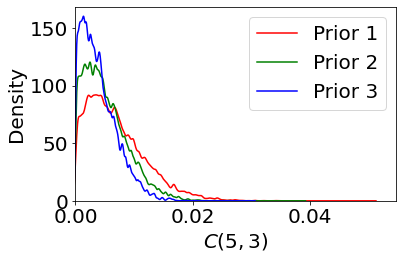

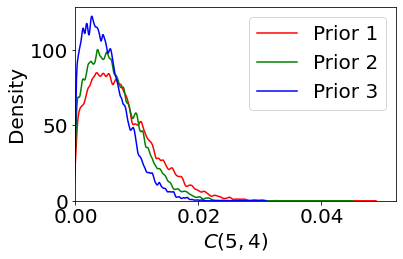

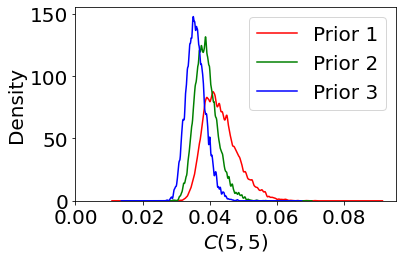

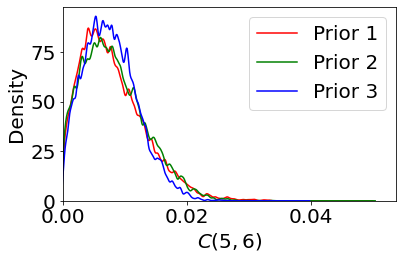

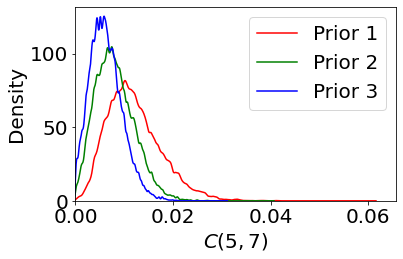

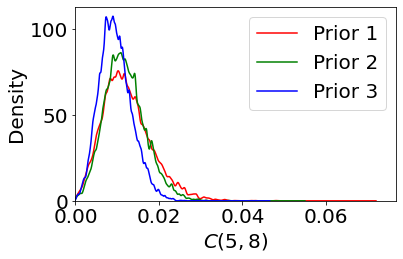

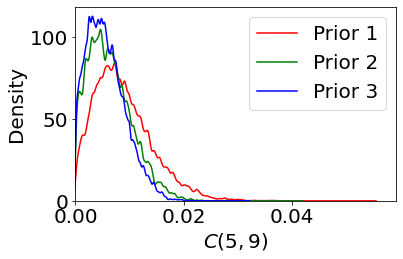

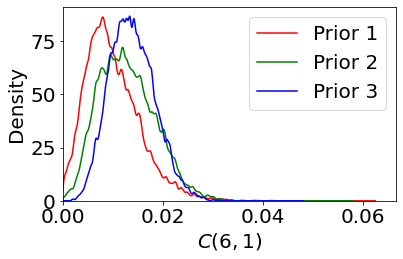

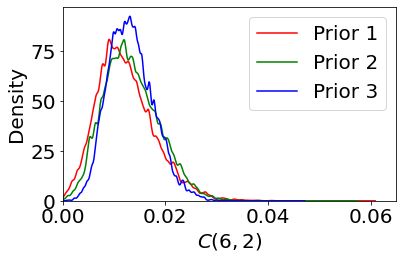

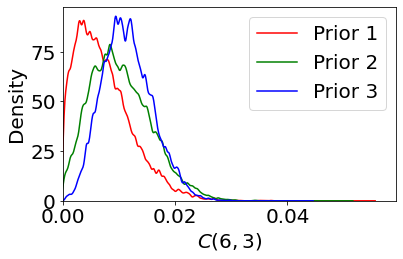

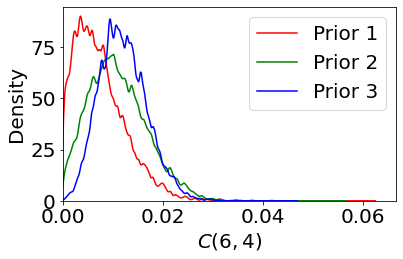

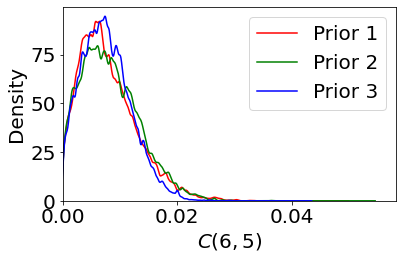

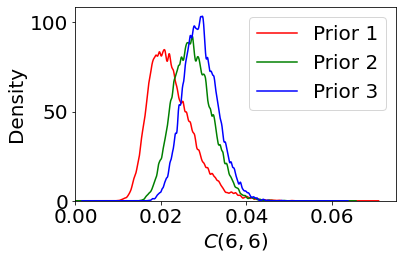

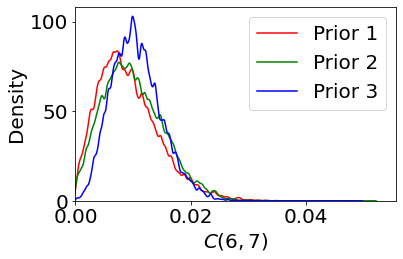

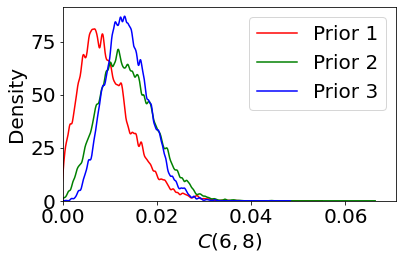

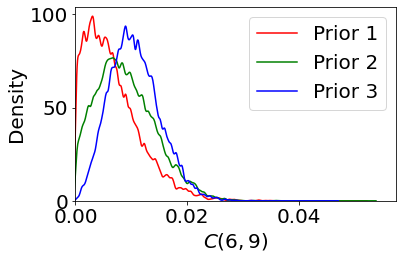

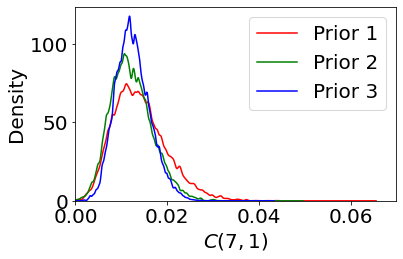

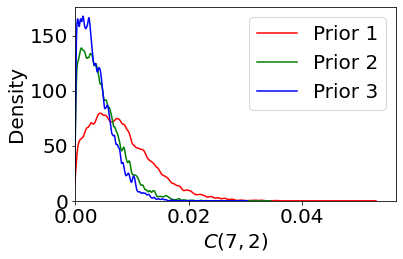

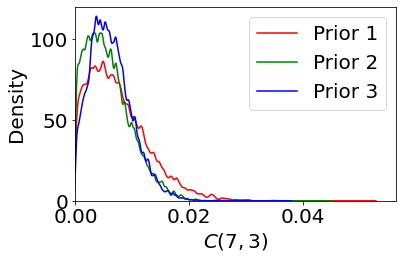

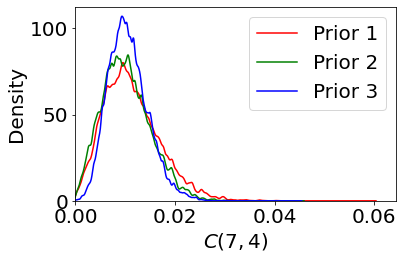

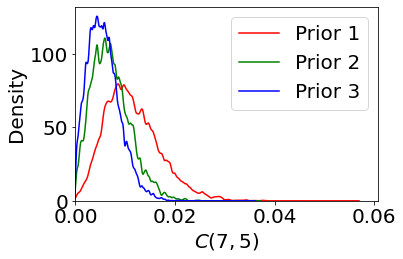

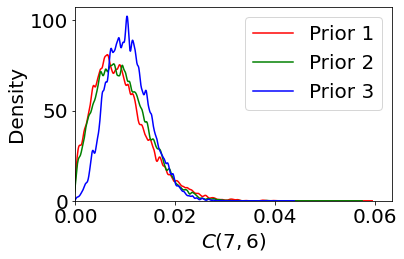

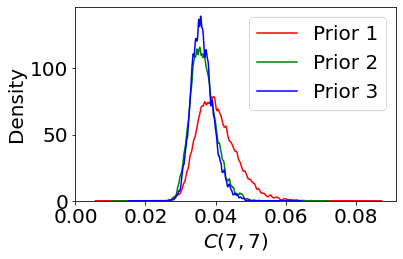

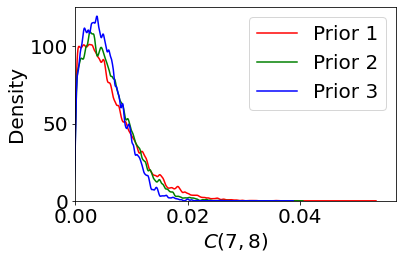

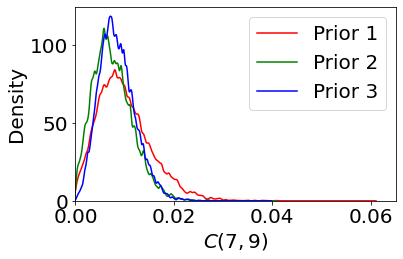

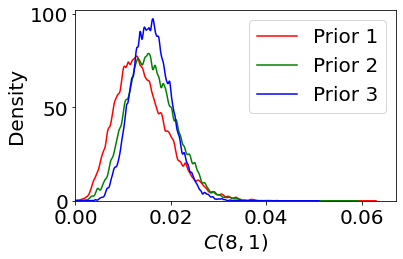

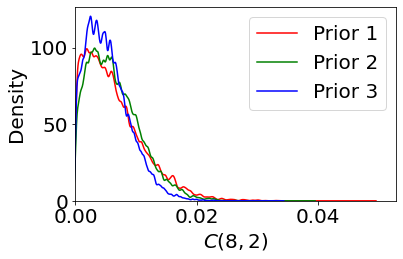

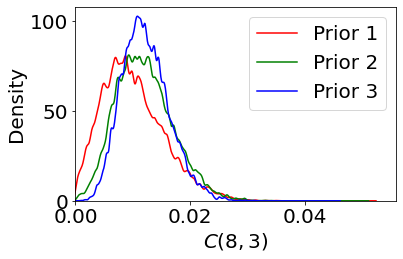

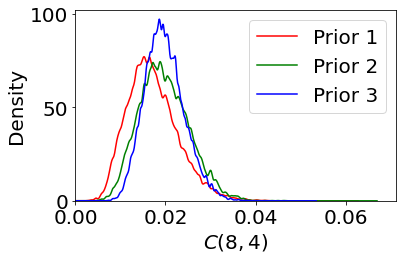

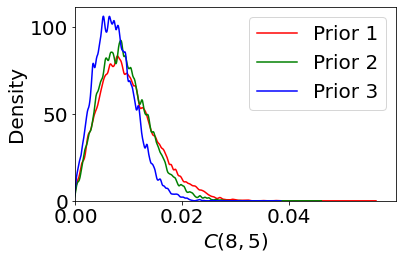

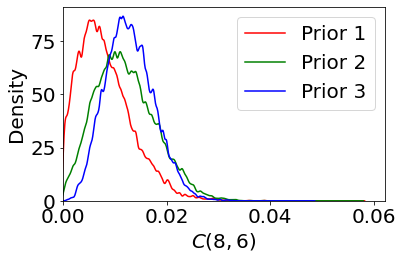

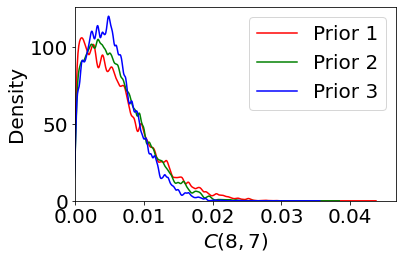

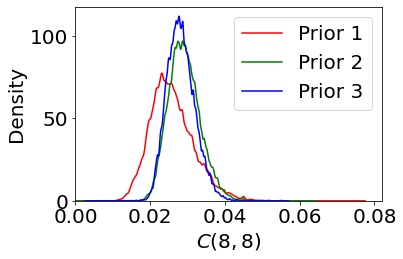

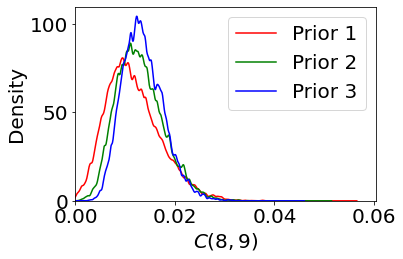

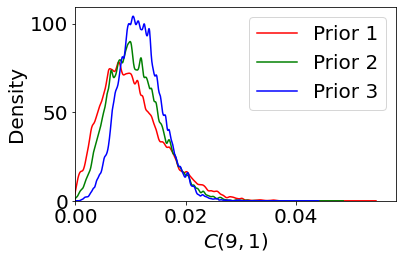

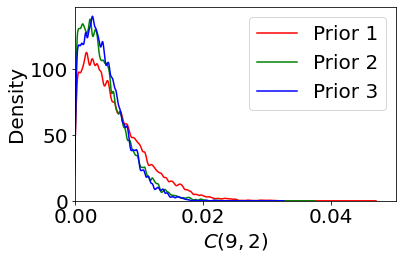

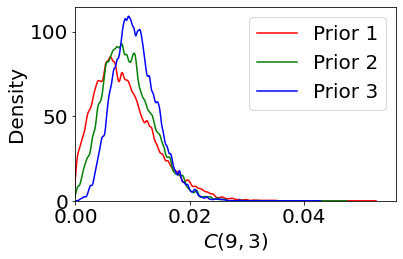

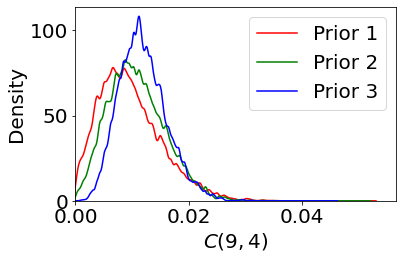

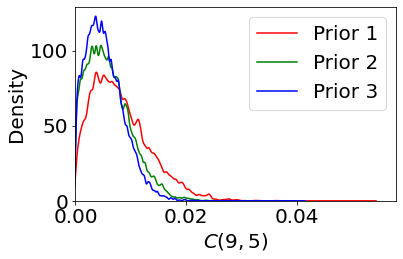

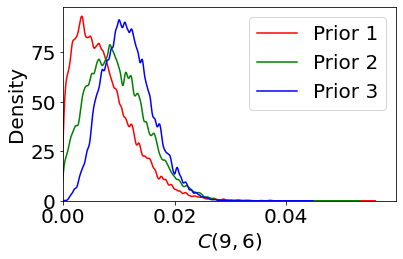

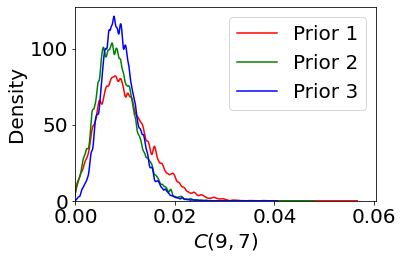

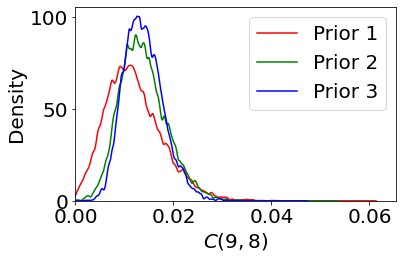

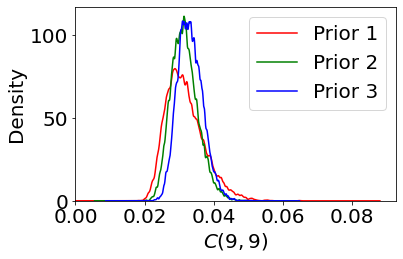

In [6]:
matplotlib.rcParams.update({'font.size': 20})
mat1, mat2, mat3 = plot_pdf(data_C_1, data_C_2, data_C_3)

## Plot migration data

<AxesSubplot:ylabel='Origin'>

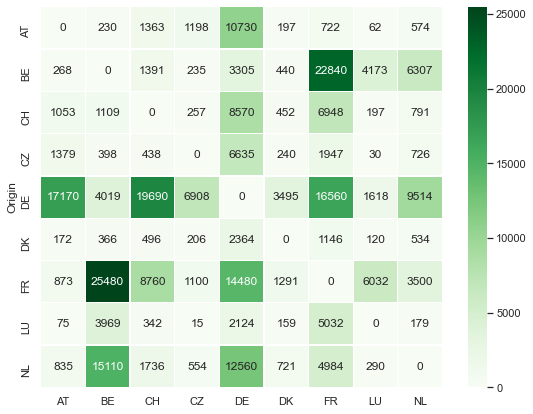

In [238]:
import seaborn as sns

folder_path = './EU_migration_data/'

file_1 = 'EU_migration_data_1.tsv'
df_1 = pd.read_csv(folder_path + file_1, sep = ' ')

file_2 = 'EU_migration_data_2.tsv'
df_2 = pd.read_csv(folder_path + file_2, sep = ' ')

df = pd.concat([df_1, df_2.drop(labels = 'Origin', axis = 1)], axis = 1)
countries = ['DK', 'DE', 'NL', 'CZ', 'BE', 'LU', 'FR', 'CH', 'AT']
countries.sort()
data = df.loc[df['Origin'].isin(countries)]
data = data[['Origin']+countries].reindex().set_index('Origin')
data_plot = data[countries].astype(int)

fig, ax = plt.subplots(1, 1, figsize=(9, 7))
sns.set(font_scale=1.)
sns.heatmap(data_plot[countries], linewidths = 0.30, annot = True, ax=ax, fmt='g', cmap = 'Greens')

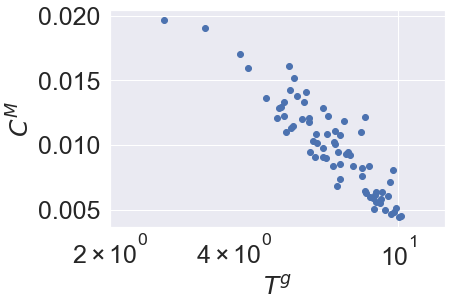

In [24]:
matplotlib.rcParams.update({'font.size': 30})
col1 = data_plot.stack().reset_index()
col2 = pd.DataFrame(mat2).stack().reset_index()
fig, ax = plt.subplots()
ax.scatter(x=np.log(col1[0]), y=col2[0])
#ax.set_yscale('log')
ax.set_xlim(left=2.5, right = 13)
ax.set_xscale('log')
ax.set_xlabel('$T^g$', fontsize = 25)
ax.set_ylabel('$C^M$', fontsize = 25)
ax.set_xticks(ticks = [2, 4, 10], minor=True)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)


fig.show()

(Left) European migration data. (Right) Mean of the inferred cost. An upper limit = 0.012 for the values is set to increase resolution on low cost areas.

<AxesSubplot:>

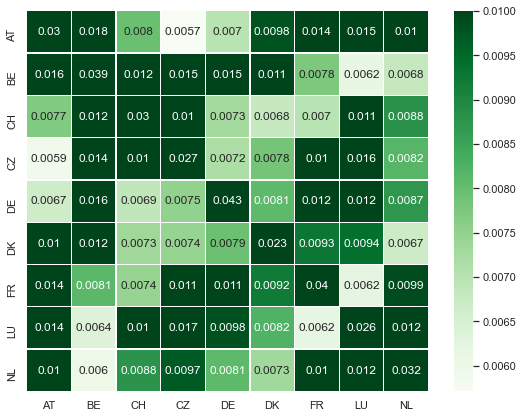

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
df_mat = pd.DataFrame(mat1)
sns.set(font_scale=1.)
sns.heatmap(df_mat, linewidths = 0.30, annot = True, ax=ax, cmap = 'Greens', vmax = 0.01, \
           xticklabels = countries, yticklabels = countries)

<AxesSubplot:>

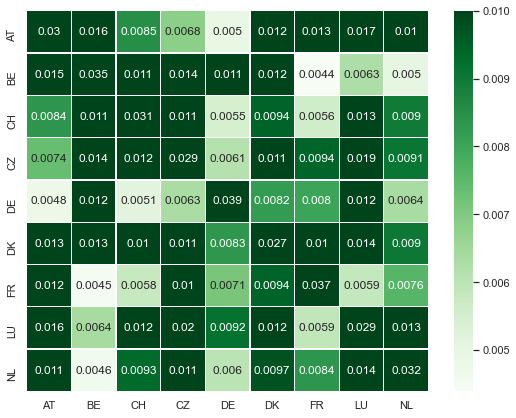

In [260]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
df_mat = pd.DataFrame(mat2)
sns.set(font_scale=1.)
sns.heatmap(df_mat, linewidths = 0.30, annot = True, ax=ax, cmap = 'Greens', vmax = 0.01,\
           xticklabels = countries, yticklabels = countries)

<AxesSubplot:>

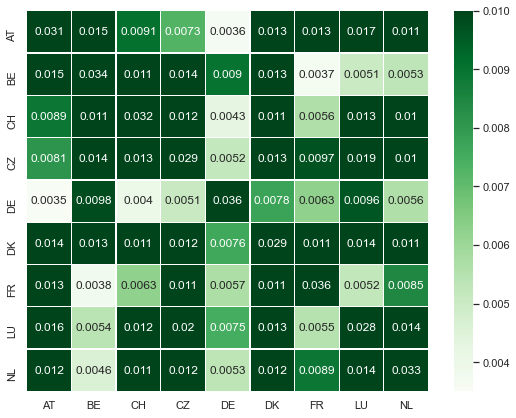

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
df_mat = pd.DataFrame(mat3)
sns.set(font_scale=1.)
sns.heatmap(df_mat, linewidths = 0.30, annot = True, ax=ax, cmap = 'Greens', vmax = 0.01,\
           xticklabels = countries, yticklabels = countries)